# Applied Machine Learning: Unsupervised Learning

### Content
* [Introduction](#introduction)
* Dimensionality Reduction and Manifold Learning
    * [Principal Components Analysis](#PCA)
* Manifold learning methods
    * [Multidimensional scaling](#MDS)
    * [t-SNE](#tSNE)
* Clusttering
    * [K-means](#kmeans)
    * [Agglomerative Clustering](#AC)
    * [DBSCAN](#DBSCAN)
* [Material to read](#revise)

<a id="introduction"></a> 
## Introduction

**Unsupervised machine learning** involves a wide variety of tasks where unlike supervised learning **there's no target value to be predicted**. Instead, the job of the unsupervised learning algorithm is to take the raw data and **capture some interesting structure in it**. 

This is useful for a number of scenarios, to explore and visualize the structure in a complex dataset, to do **density estimation, to predict the probabilities of events. To compress the data, to extract more effective features before applying a supervised learning algorithm. Or to discover important structures like clusters of similar objects or unusual or individual outliers in the data**. All of these and other unsupervised learning tasks have in common the property that there are no target values, labels or output to learn from or to be predicted. Instead, we only have the unlabeled samples in the dataset as input. 

<img src="module_5_Intro_1.png" alt="jupyter" style="width: 600px;"/>

Here's an example of an **unsupervised method called clustering**. Suppose you're in charge of running a website that allows people to buy products from your company. And the site gets thousands of visits per day. As people access the site by clicking links to products or typing in search terms, their interactions are logged by the web server that creates a large log file. 

It might be **useful for your business to understand who's using your site by grouping users according to their shopping behavior**. For example, there might be a group of more expert users who use more advanced features to find something very specific. While another group of non-expert users might just enjoy browsing a broader set of items. 

By clustering users into groups, you might gain some **insight into who your typical customers are and what site features different types of users find important**. You could use insights from clustering users to improve the site's features for different groups or to recommend products to specific groups that would be more likely to buy them. 

<img src="module_5_Intro_2.png" alt="jupyter" style="width: 600px;"/>

So in this lecture, we'll give a brief survey of unsupervised learning methods divided into two major categories. First we'll look at one family of **unsupervised methods called transformations**, because they essentially just run the original data through some kind of useful process that extracts or computes information of some kind. Then we'll look at the other **broad family of unsupervised learning methods which are the clustering methods**. Like in our website example that find groups in the data and assign every point in the dataset to one of the groups. 

<img src="module_5_Intro_3.png" alt="jupyter" style="width: 600px;"/>

Okay, let's look at some important unsupervised learning **methods that transform the input data in useful ways**. One method called **density estimation is used when you have a set of measurements scattered throughout an area. And you want to create what you can think of as a smooth version over the whole area that gives a general estimate for how likely it would be to observe a particular measurement in some area of that space**. 

<img src="module_5_Intro_4.png" alt="jupyter" style="width: 600px;"/>

For example, in a medical application related to diagnosing diabetes, density estimation with one variable might be used to estimate the distribution of a specific test score. The plasma glucose concentration number from a blood test for people who have a particular form of diabetes. With this density estimate we can estimate the probability that anyone with that medical condition has a particular glucose score. Even if that specific score wasn't seen in the original dataset. 
<img src="module_5_Intro_5.png" alt="jupyter" style="width: 600px;"/>

We could then compare this to the range of glucose levels for people who do not have that condition, which is shown by the red line here. 

<img src="module_5_Intro_6.png" alt="jupyter" style="width: 600px;"/>

Often, density estimates are then used in further machine learning stages as part of providing features for classification or regression. **The more technical way to say this is that density estimation calculates a continuous probability density over the feature space, given a set of discrete samples in that feature space**. With this density estimate, we can estimate how likely any given combination of features is to occur. In Scikit-Learn, you can use the kernel density class in the ```sklearn.neighbors``` module to perform one widely used form of density estimation called **kernel density estimation**. Kernel density's especially popular for use in creating heat maps with geospatial data like this one. 

<img src="module_5_Intro_7.png" alt="jupyter" style="width: 600px;"/>

## Preamble and Datasets

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Dimensionality Reduction and Manifold Learning

<a id="PCA"></a> 
### Principal Components Analysis (PCA)

Another very important family of unsupervised learning methods that fall into the transformation category are known as **dimensionality reduction algorithms**. As the name suggests, this kind of transform takes your original dataset that might contain say, 200 features and finds an approximate version of dataset that uses, say, only 10 dimensions. One very common need for dimensionality reduction arises when first exploring a dataset, to understand how the samples may be grouped or related to each other by visualizing it using a two-dimensional scatterplot. 

One very important form of dimensionality reduction is called principal component analysis, or **PCA**. Intuitively, what **PCA does is take your cloud of original data points and finds a rotation of it. So the dimensions are statistically uncorrelated. PCA then typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset**. 

<img src="module_5_Dimreduc_1.png" alt="jupyter" style="width: 600px;"/>


Here's a simple example of what I mean with a synthetic two-dimensional dataset. Here, if we have two original features that are highly correlated represented by this cloud of points, PCA will rotate the data so the direction of highest variance - called the first principal component, which is along the long direction of the cloud, becomes the first dimension. It will then find the direction at right angles that maximally captures the remaining variance. This is the second principle component. In two dimensions, there's only one possible such direction at right angles of the first principal component, but for higher dimensions, there would be infinitely many. With more than two dimensions, the process of finding successive principal components at right angles to the previous ones would continue until the desired number of principal components is reached. 

One result of applying PCA is that we now know the best one-dimensional approximation to the original two-dimensional data. In other words, we can take any data point that used two features before - x and y - and approximate it using just one feature, namely its location when projected onto the first principal component. 

<img src="module_5_Dimreduc_2.png" alt="jupyter" style="width: 600px;"/>


#### Using PCA to find the first two principal components of the breast cancer dataset

Here's an example of using scikit learn to apply PCA to a higher dimensional dataset; the breast cancer dataset. To perform PCA, we import the PCA class from ``sklearn.decomposition``. It's important to first transform the dataset so that each features range of values has zero mean and unit variance. And we can do this using the fit and transform methods of the standard scalar class, as shown here. We then create the PCA object, specify that we want to retain just the first two principal components to reduce the dimensionality to just two columns and call the fit method using our normalized data. This will set up PCA so that it learns the right rotation of the dataset. We can then apply this properly prepared PCA object to project all the points in our original input dataset to this new two-dimensional space. Notice here since we're not doing supervised learning in evaluating a model against a test set, we don't have to split our dataset into training and test sets. You see that if we take the shape of the array that's returned from PCA, it's transformed our original dataset with 30 features into a new array that has just two columns, essentially expressing each original data point in terms of two new features representing the position of the data point in this new two-dimensional PCA space. 

<img src="module_5_Dimreduc_3.png" alt="jupyter" style="width: 600px;"/>


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


We can then create a scatterplot that uses these two new features to see how the data forms clusters. In this example, we've used the dataset that has labels for supervised learning; namely, the malignant and benign labels on cancer cells. **So we can see how well PCA serves to find clusters in the data**. 

Here's the result of plotting all the 30 feature data samples using the two new features computed with PCA. We can see that the malignant and benign cells do indeed tend to cluster into two groups in the space. In fact, we could now apply a linear classifier to this two-dimensional representation of the original dataset and we can see that it would likely do fairly well. This illustrates another use of dimensionality reduction methods like PCA to find informative features that could then be used in a later supervised learning stage. 


<IPython.core.display.Javascript object>


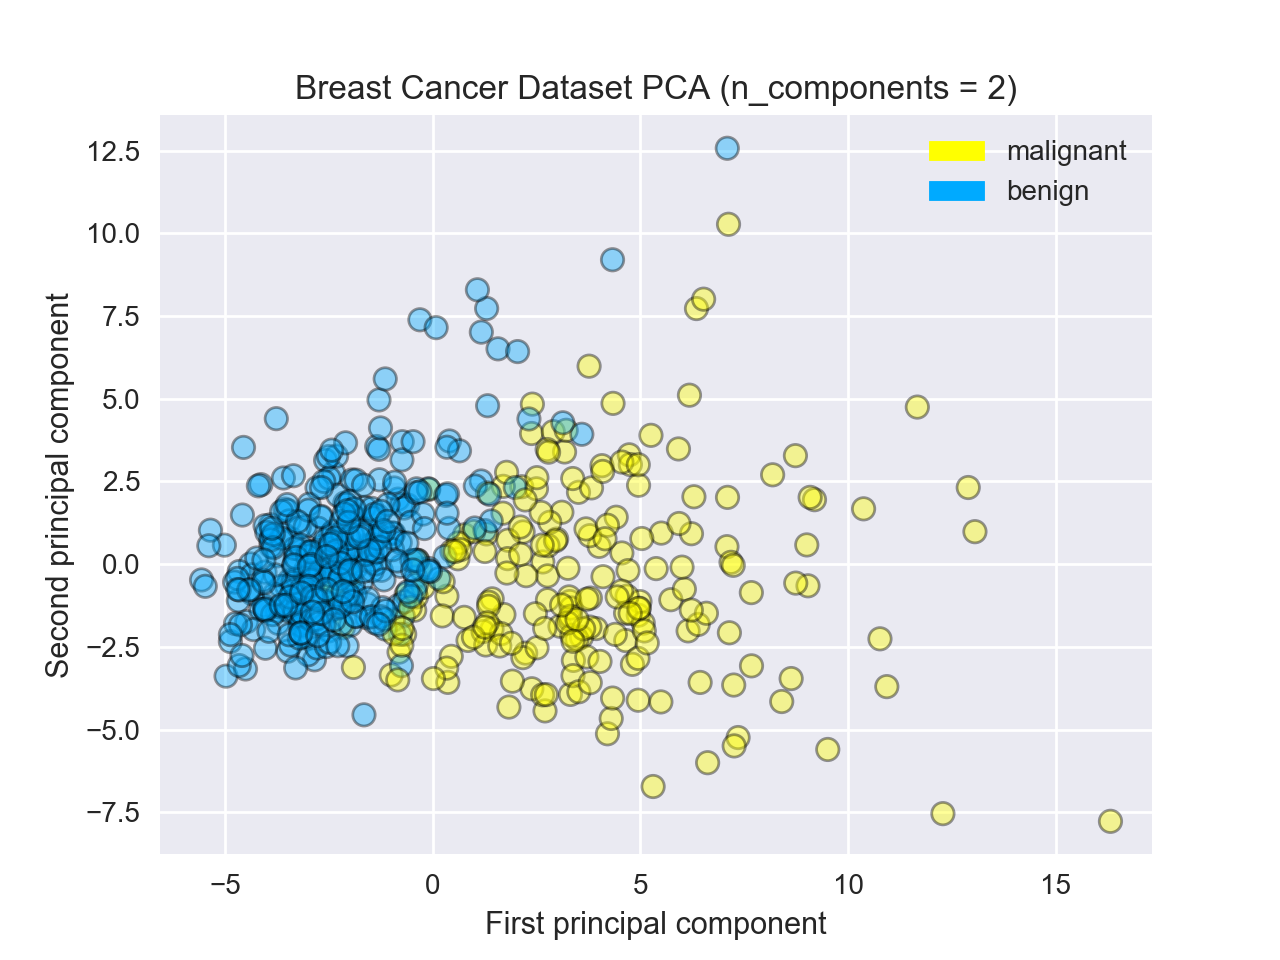

In [5]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the PCA-transformed version of the breast cancer dataset

<img src="module_5_Dimreduc_4.png" alt="jupyter" style="width: 600px;"/>

We can create a heat map that visualizes the first two principal components of the breast cancer dataset to get an idea of what feature groupings each component is associated with. Note that we can **get the arrays representing the two principal component axes that define the PCA space using the PCA**.*components_* attribute that's filled in after the PCA fit method is used on the data. We can see that the first principle component is all positive, showing a general correlation between all 30 features. In other words, they tend to vary up and down together. The second principle component has a mixture of positive and negative signs; but in particular, we can see a cluster of negatively signed features that co-vary together and in the opposite direction of the remaining features. Looking at the names, it makes sense the subset wold co-vary together. We see the pair *mean texture* and *worst texture*, and the *pair mean radius* and *worst radius* varying together and so on. 

PCA gives a good initial tool for exploring a dataset, but may not be able to find more subtle groupings that produce better visualizations for more complex datasets. There is a family of unsupervised algorithms called **Manifold Learning Algorithms that are very good at finding low dimensional structure in high dimensional data and are very useful for visualizations**. 

<img src="module_5_Dimreduc_5.png" alt="jupyter" style="width: 600px;"/>



#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


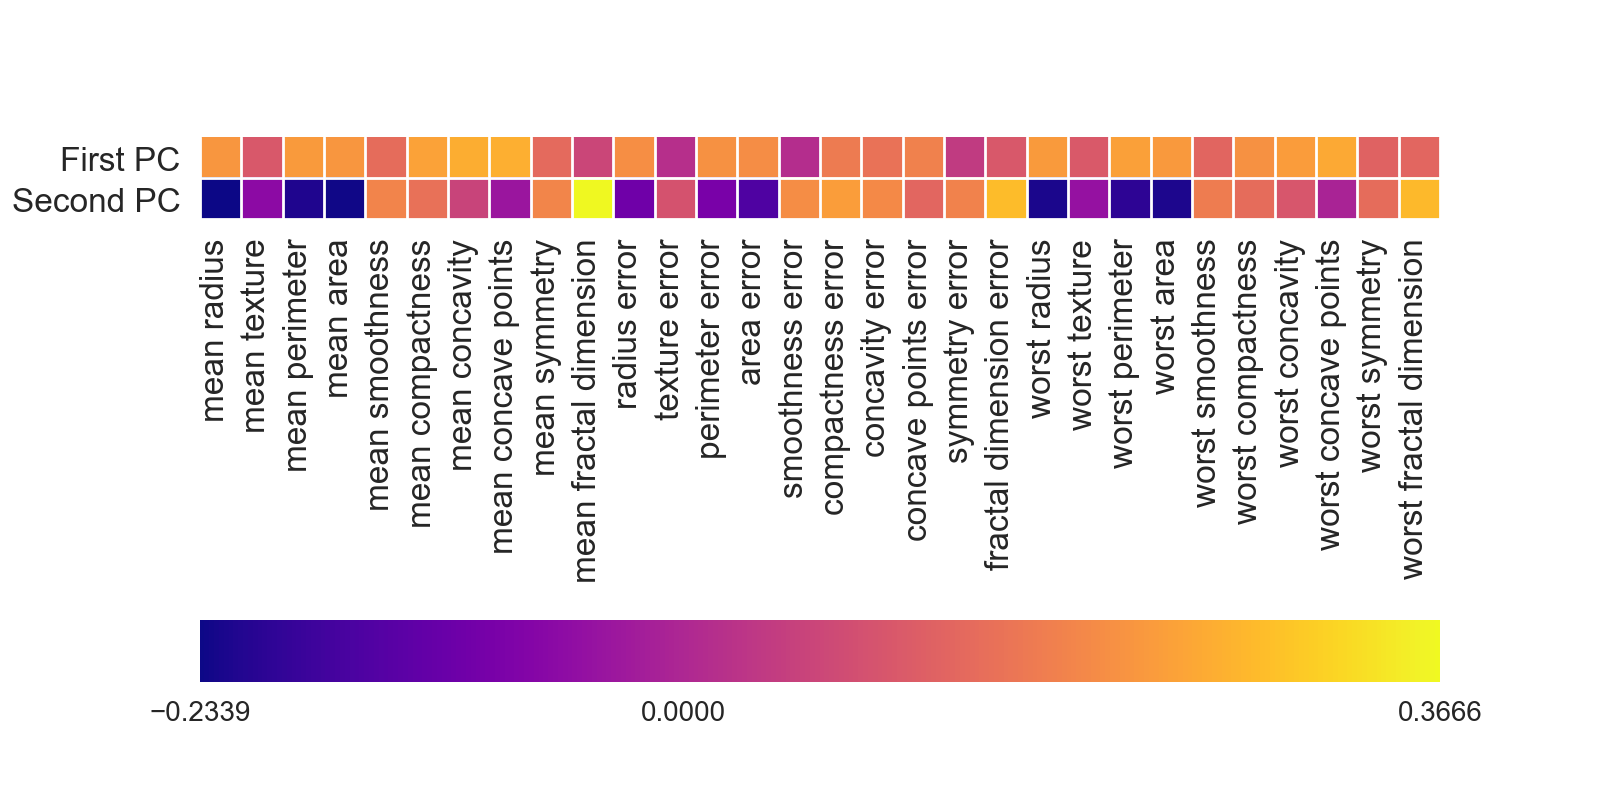

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], v
                          a='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

One classic example of a low dimensional subset in a high dimensional space is this data set in three dimensions, where the points all lie on a two-dimensional sheet with an interesting shape. **This lower dimensional sheet within a higher dimensional space is called the manifold**. PCA is not sophisticated enough to find this interesting structure. 

<img src="module_5_Dimreduc_6.png" alt="jupyter" style="width: 600px;"/>

<IPython.core.display.Javascript object>


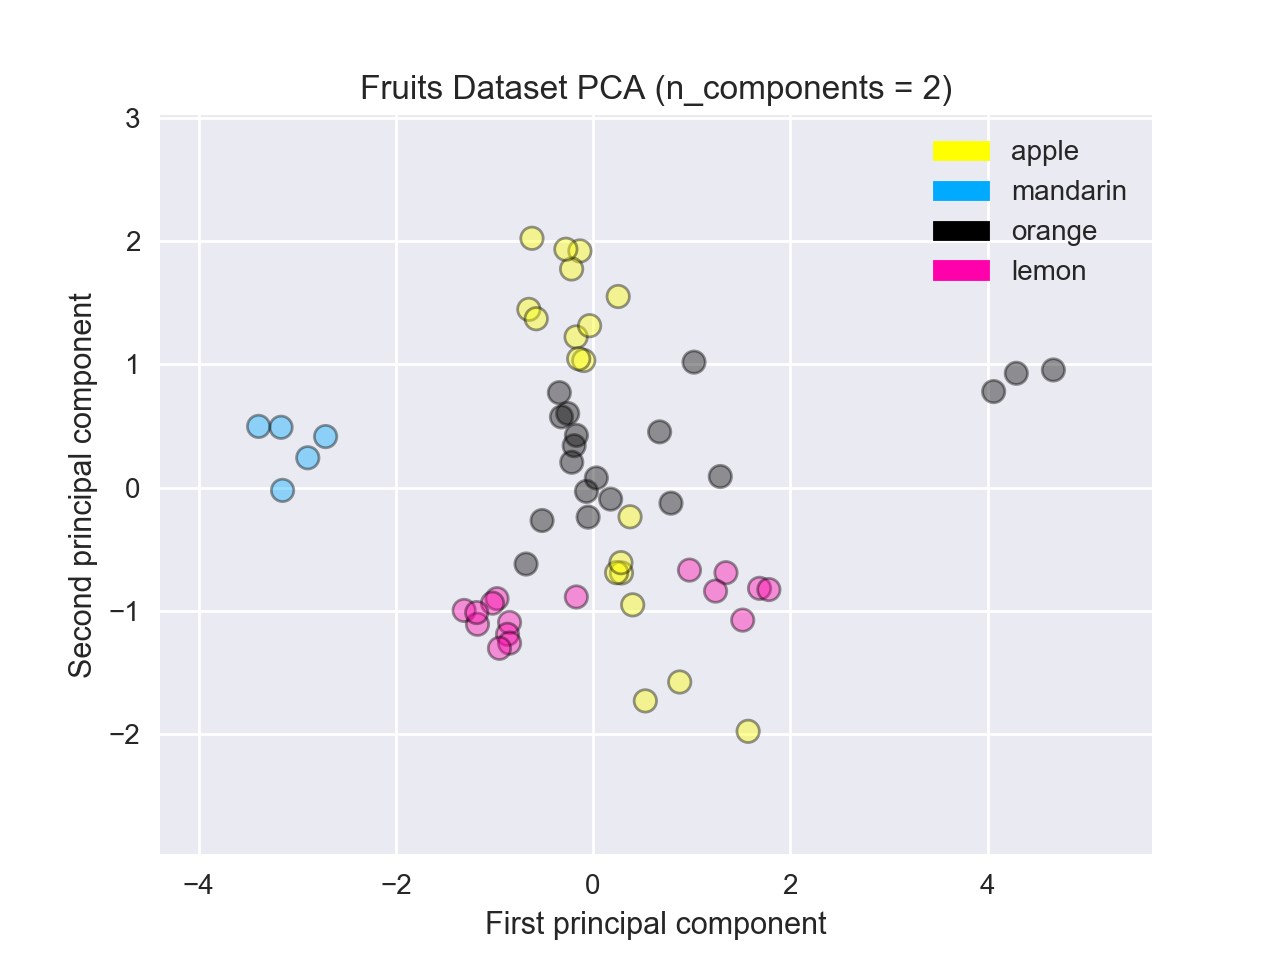

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### Manifold learning methods

One widely used manifold learning method is called **multi-dimensional scaling, or MDS**. There are many flavors of MDS, but they all have the same general goal; **to visualize a high dimensional dataset and project it onto a lower dimensional space - in most cases, a two-dimensional page - in a way that preserves information about how the points in the original data space are close to each other**. In this way, you can find and visualize clustering behavior in your high dimensional data.


<img src="module_5_Dimreduc_7.png" alt="jupyter" style="width: 600px;"/>

Using a technique like MDS and scikit learn is quite similar to using PCA. **Like with PCA, each feature should be normalized so its feature values have zero mean and unit variants**. After importing the MDS class from ```sklearn.manifold``` and transforming the input data, you create the MDS object, specifying the number of components - typically set to two dimensions for visualization. You then fit the object using the transform data, which will learn the mapping and then you can apply the MDS mapping to the transformed data. Here's an example of applying MDS to the fruit dataset. And you can see it does a pretty good job of visualizing the fact that the different fruit types do indeed tend to cluster into groups. 


<img src="module_5_Dimreduc_8.png" alt="jupyter" style="width: 600px;"/>
<img src="module_5_Dimreduc_9.png" alt="jupyter" style="width: 600px;"/>


<a id="MDS"></a> 
#### Multidimensional scaling (MDS) on the fruit dataset

<IPython.core.display.Javascript object>


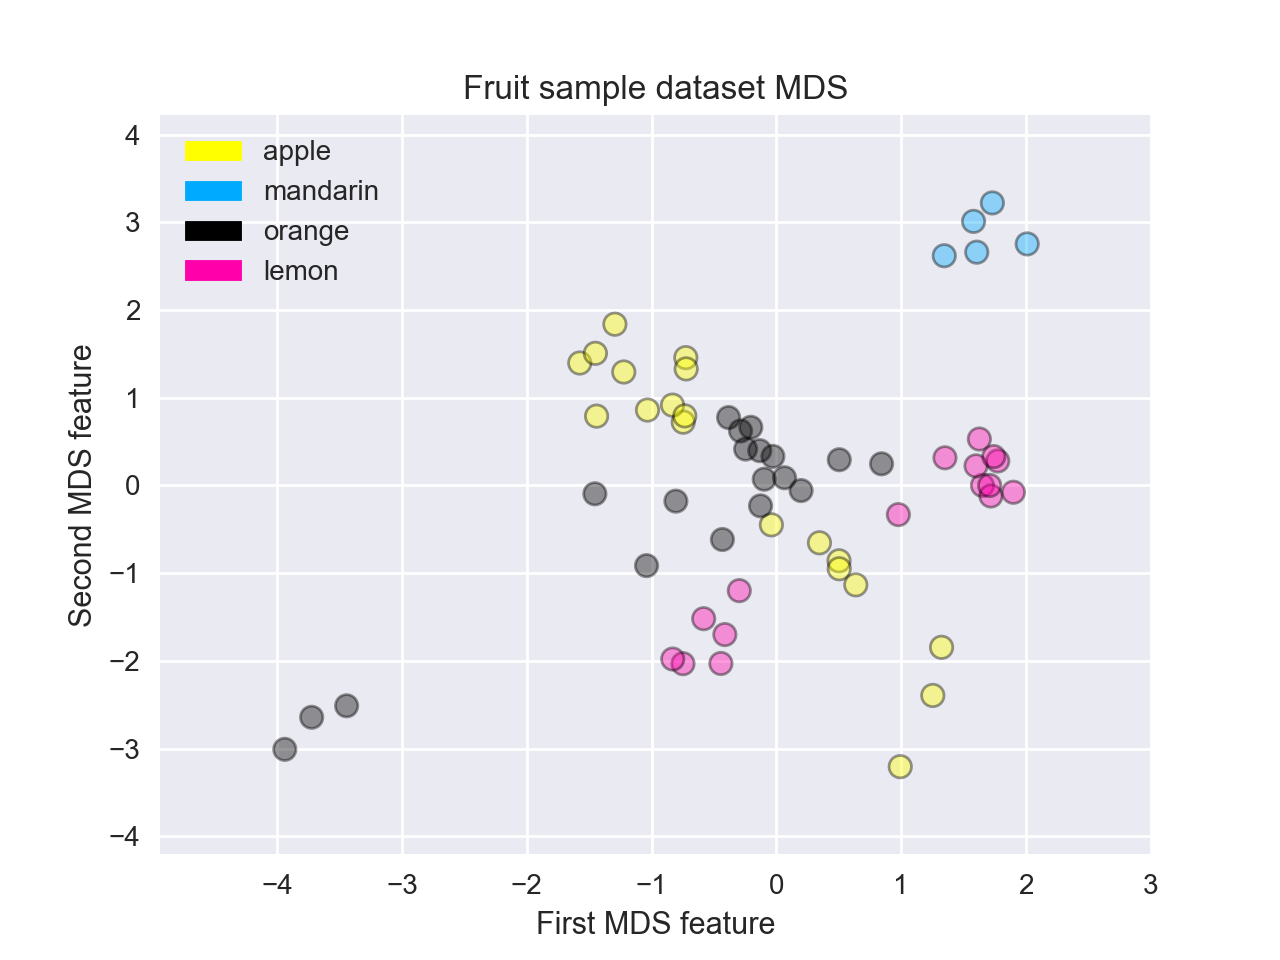

In [8]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


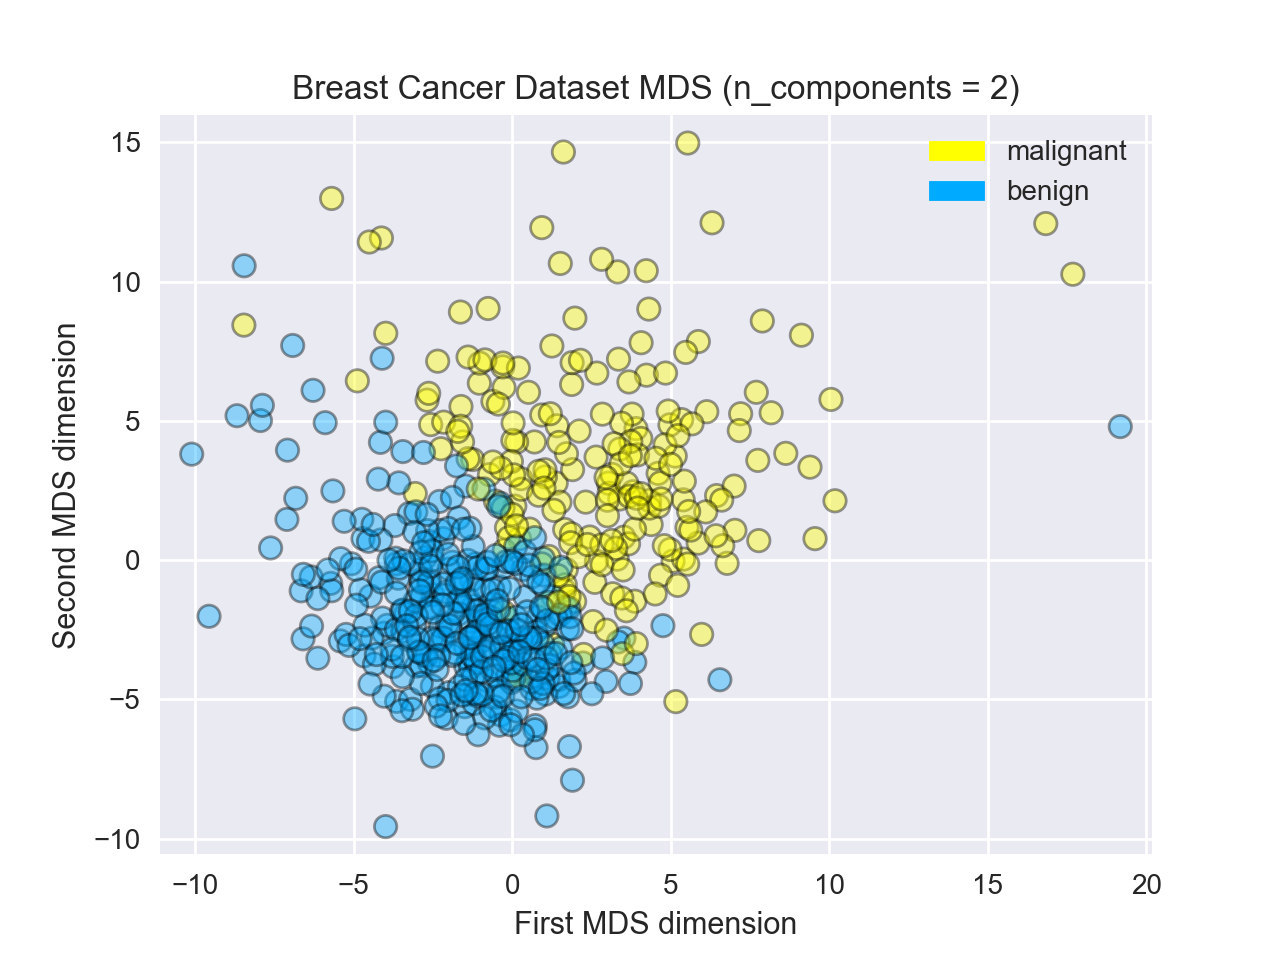

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

An especially powerful manifold learning algorithm for visualizing your data is called **t-SNE**. t-SNE **finds a two-dimensional representation of your data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset**. In particular, **t-SNE gives much more weight to preserving information about distances between points that are neighbors**. 

Here's an example of t-SNE applied to the images in the handwritten digits dataset. You can see that this two-dimensional plot preserves the neighbor relationships between images that are similar in terms of their pixels. For example, the cluster for most of the digit eight samples is closer to the cluster for the digits three and five, in which handwriting can appear more similar than to say the digit one, whose cluster is much farther away.

<img src="module_5_Dimreduc_10.png" alt="jupyter" style="width: 600px;"/>

And here's an example of applying t-SNE on the fruit dataset. The code is very similar to applying MDS and essentially just replaces MDS with t-SNE. The interesting thing here is that t-SNE does a poor job of finding structure in this rather small and simple fruit dataset, which reminds us that we should try at least a few different approaches when visualizing data using manifold learning to see which works best for a particular dataset. **t-SNE tends to work better on datasets that have more well-defined local structure; in other words, more clearly defined patterns of neighbors**. 

<img src="module_5_Dimreduc_11.png" alt="jupyter" style="width: 600px;"/>


<a id="tSNE"></a> 
#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)

<IPython.core.display.Javascript object>


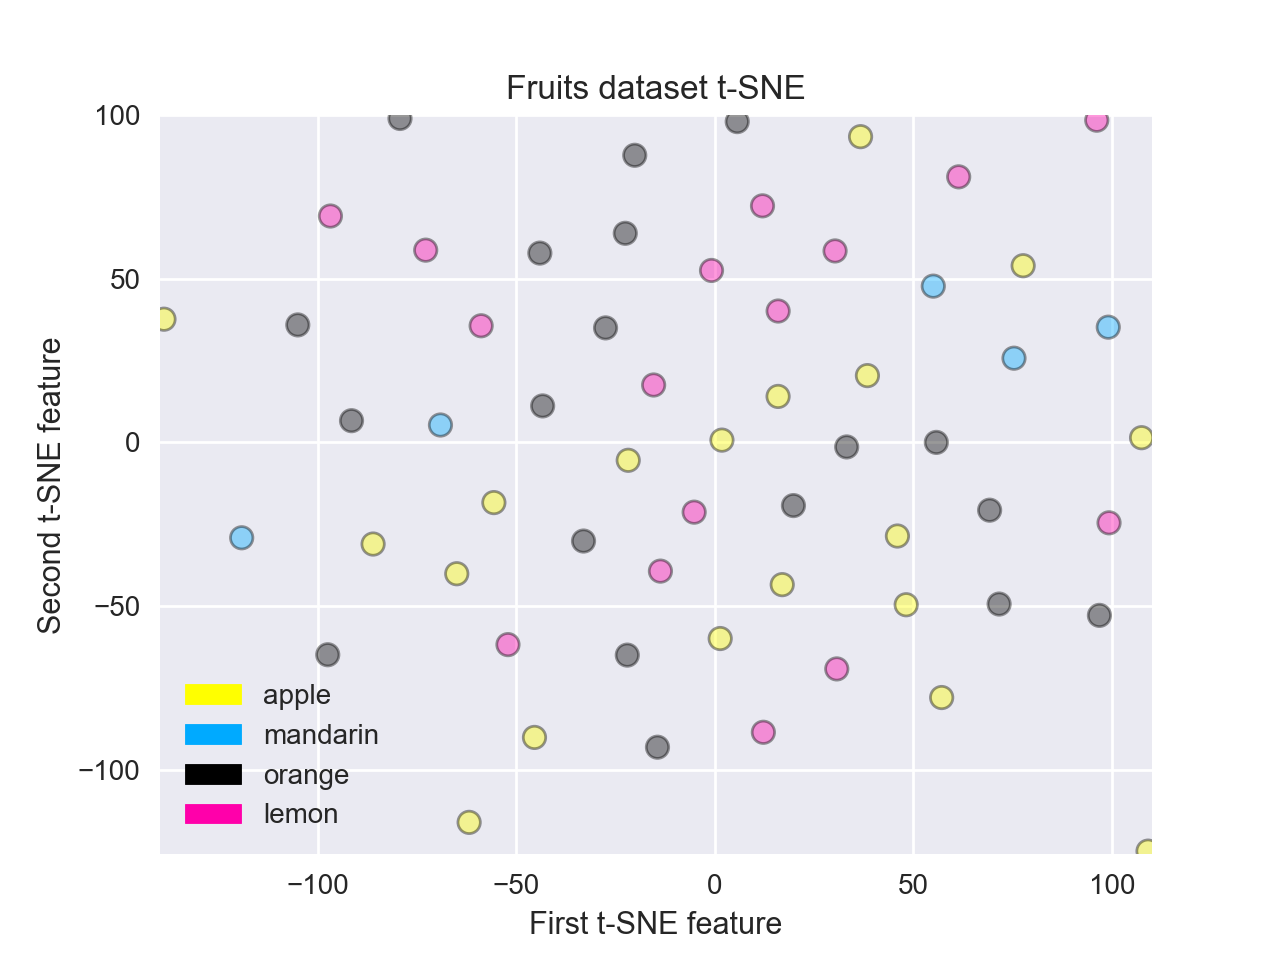

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


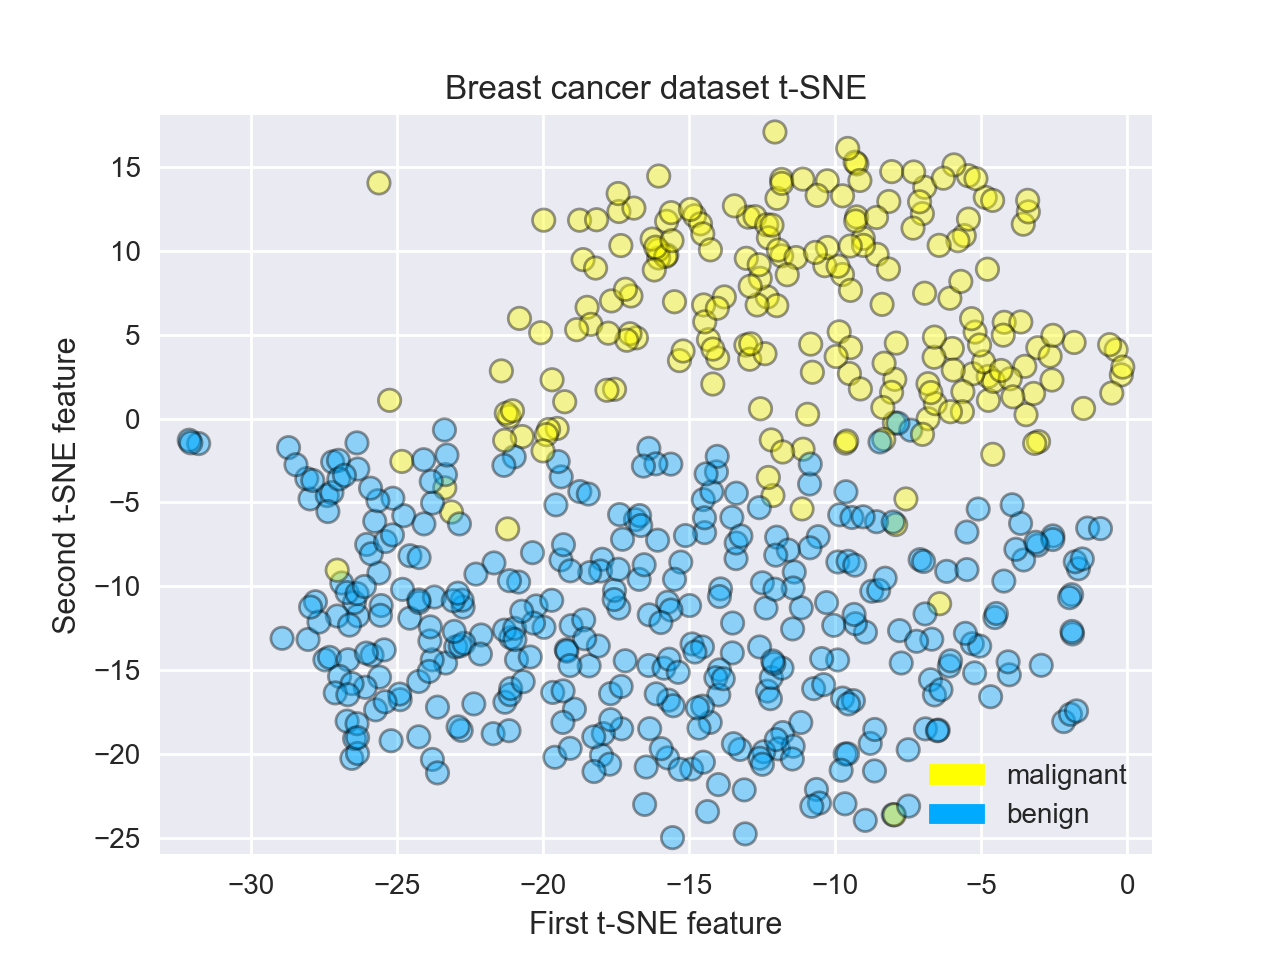

In [11]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

Aside from transformations, the other family of unsupervised learning methods are the **clustering methods**. The goal of clustering is to **find a way to divide up a data set into groups called clusters. So that groups with similar data instances are assigned to the same cluster, while very dissimilar objects are assigned to different clusters**. 

If new data points were being added over time, some clustering algorithms could also predict which cluster a new data instance should be assigned to. Similar to classification, but without being able to train the clustering model using label examples in advanced. 

<img src="module_5_clustering_1.png" alt="jupyter" style="width: 600px;"/>

One of the most widely used clustering algorithms is called **k-means clustering. K-means clustering finds k cluster centers in different regions of the feature space that it thinks represent very different groups**. You need to **specify the value of k ahead of time**, which is one of the draw backs of k-means. For some problems, we may know the number of classes the data should fall into, but for many other tasks, we might not. 

* K-means operates by first randomly picking locations for the k-cluster centers. Then it goes back and forth between two steps:

* In the first step, given the locations of existing cluster centers, it assigns each data point to a cluster center based on its distance from the center. In other words, it assigns each data point to the closest center. 

* Then in the second step, it adjusts the locations of each cluster center. It does this by setting the new cluster center to the mean of the positions of all the data points in that cluster. 

* Somewhat magically, after running this alternating process for a while, coherent clusters do start to form, and the cluster centers and the corresponding cluster assignment for each data point eventually settled down to something stable. 

<img src="module_5_clustering_2.png" alt="jupyter" style="width: 600px;"/>


**Now one aspect of k means is that different random starting points for the cluster centers often result in very different clustering solutions. So typically, the k-means algorithm is run in scikit-learn with ten different random initializations. And the solution occurring the most number of times is chosen**. Here is a step by step example. 

* We first choose three locations in the space randomly to be the cluster centers. Then we assign each data point to the cluster with the nearest center. 


<img src="module_5_clustering_3.png" alt="jupyter" style="width: 600px;"/>


Now for each cluster, we compute the mean location of all points in the cluster and use that as the new cluster center for the next iteration. 

<img src="module_5_clustering_4.png" alt="jupyter" style="width: 600px;"/>

Here's the second iteration of the first and second steps. 

<img src="module_5_clustering_5.png" alt="jupyter" style="width: 600px;"/>

Eventually, after 20 or 50 or 100 steps, things settle down to converge on one solution, as shown here. 

<img src="module_5_clustering_6.png" alt="jupyter" style="width: 600px;"/>

<img src="module_5_clustering_7.png" alt="jupyter" style="width: 600px;"/>


K-means clustering is simple to apply in scikit learning. You import the k-means class from ```sklearn.cluster``` create the k-means object set into value of k by specifying the n_cluster parameter, and then calling the fit method on the dataset to run the algorithm. 

One distinction should be made here between **clustering algorithms that can predict which center new data points should be assigned to, and those that cannot make such predictions**. K-means supports the predict method, and so we can call the fit and predict methods separately. Later methods we'll look at, like **agglomerative clustering do not and must perform the fit and predict in a single step**, as we'll see. 

<img src="module_5_clustering_8.png" alt="jupyter" style="width: 600px;"/>


<a id="kmeans"></a> 
### K-means

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


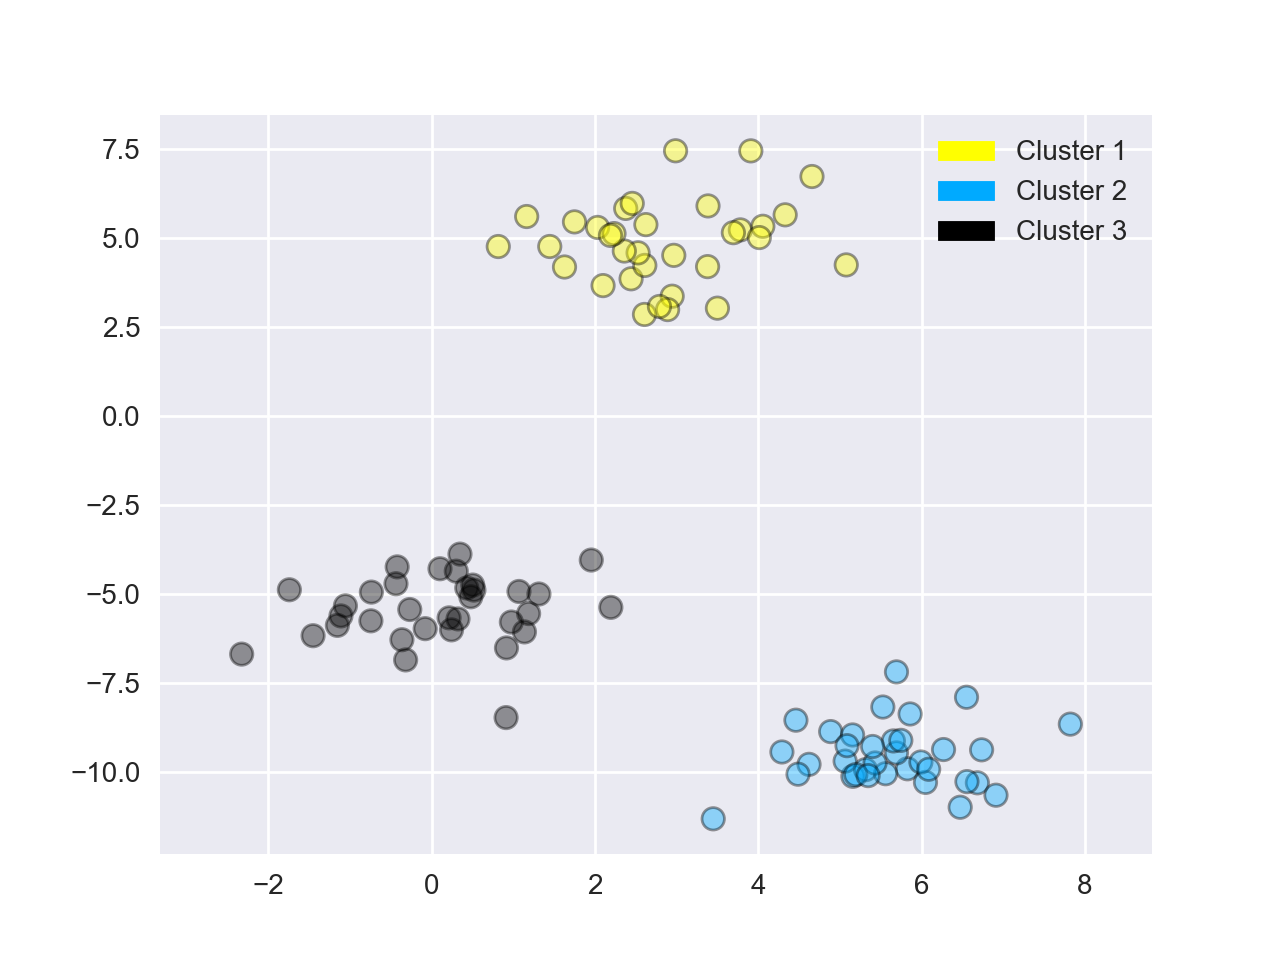

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Here's the output from the notebook code showing the result supplied to the fruits dataset, where we know the value of k ahead of time. **Note that kmeans is very sensitive to the range of future values. So if your data has features with very different ranges, it's important to normalize using min-max scaling**, as we did for some supervised learning methods. 

<img src="module_5_clustering_9.png" alt="jupyter" style="width: 600px;"/>

Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

<IPython.core.display.Javascript object>


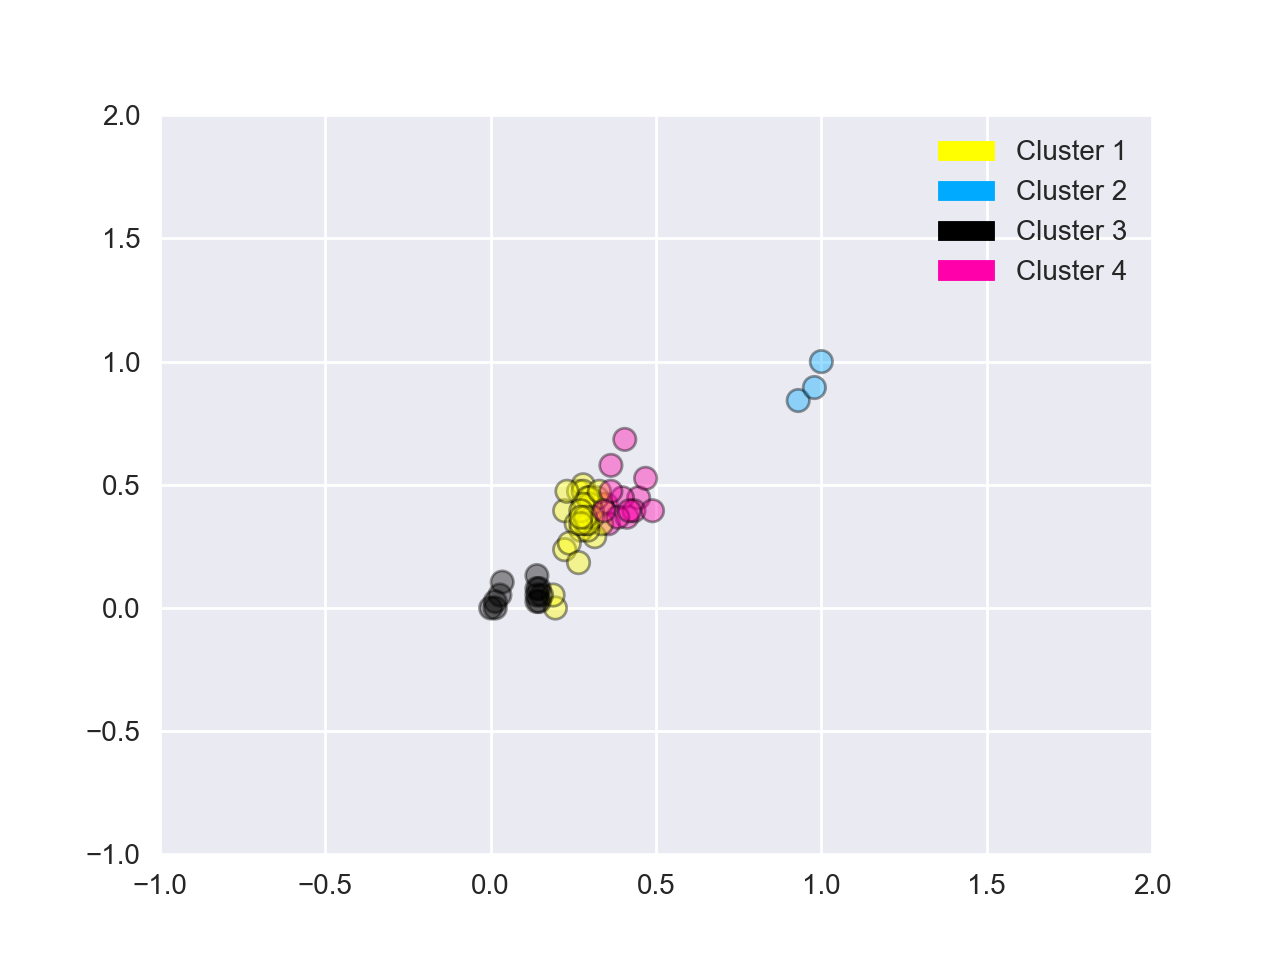

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

Because each cluster in k-means clustering is defined entirely by its center point, it can only capture fairly simple types of clusters. **K-means clustering tends to work well when the data points form into groups of roughly the same size, with simple globular shapes that are well-separated. K-means will tend not to do well if the data forms long, irregular clusters, for example**. 

Also the version k-means we saw here **assumed that the data features were continuous values. However, in some cases we may have categorical features**, where taking the mean doesn't make sense. In that case, there are **variants of k-means that can use a more general definition of distance**. Such as the **k-medoids algorithm** that can work with categorical features. 

<img src="module_5_clustering_10.png" alt="jupyter" style="width: 600px;"/>

<a id="AC"></a> 
### Agglomerative clustering

**Aglommerative clustering** refers to a family of clustering methods that work by **doing an iterative bottom up approach**. 

* First, each data point is put into its own cluster of one item. 

* Then, a sequence of clusterings are done where the **most similar two clusters at each stage are merged into a new cluster*. 

* Then, this process is repeated until some stopping condition is met. In scikit-learn, the stopping condition is the number of clusters. 

Here's a visual example of how agglomerative clustering might proceed on a sample dataset until three clusters are reached. 
* In Stage 1, each data point is in its own cluster, shown by the circles around the points.

* In Stage 2, the two most similar clusters, which at this stage amounts to defining the closest points are merged. And this process is continued, as denoted by the expanding and closed regions that denote each cluster.

<img src="module_5_clustering_12.png" alt="jupyter" style="width: 600px;"/>

You can **choose how the agglomerative clustering algorithm determines the most similar cluster** by specifying one of several possible **linkage criteria**. In scikit-learn, the following three linkage criteria are available: **ward, average, and complete**. 

* **Ward's method** chooses to merge the two clusters that give the smallest increase in total variance within all clusters (around cluster centroids). 

* **Average linkage** merges the two clusters that have the smallest average distance between points. 

* **Complete linkage**, which is also known as maximum linkage, merges the two clusters that have the smallest maximum distance between their points. 

<img src="module_5_clustering_13.png" alt="jupyter" style="width: 600px;"/>

In general, **Ward's method works well on most data sets, and that's our usual method of choice**. In some cases, if you expect the **sizes of the clusters to be very different**, for example, that **one cluster is much larger than the rest. It's worth trying average and complete linkage criteria as well**. 

To perform agglomerative clustering in scikit-learn, you import the **agglomerative clustering class** from ``sklearn.cluster``. When initializing the object, you specify the ```n_clusters``` parameter that causes the algorithm to stop when it has reach that number of clusters. You call the ``fit_predict`` method using the data set as input and they return the set of cluster assignments for the data points as shown here. 


<IPython.core.display.Javascript object>


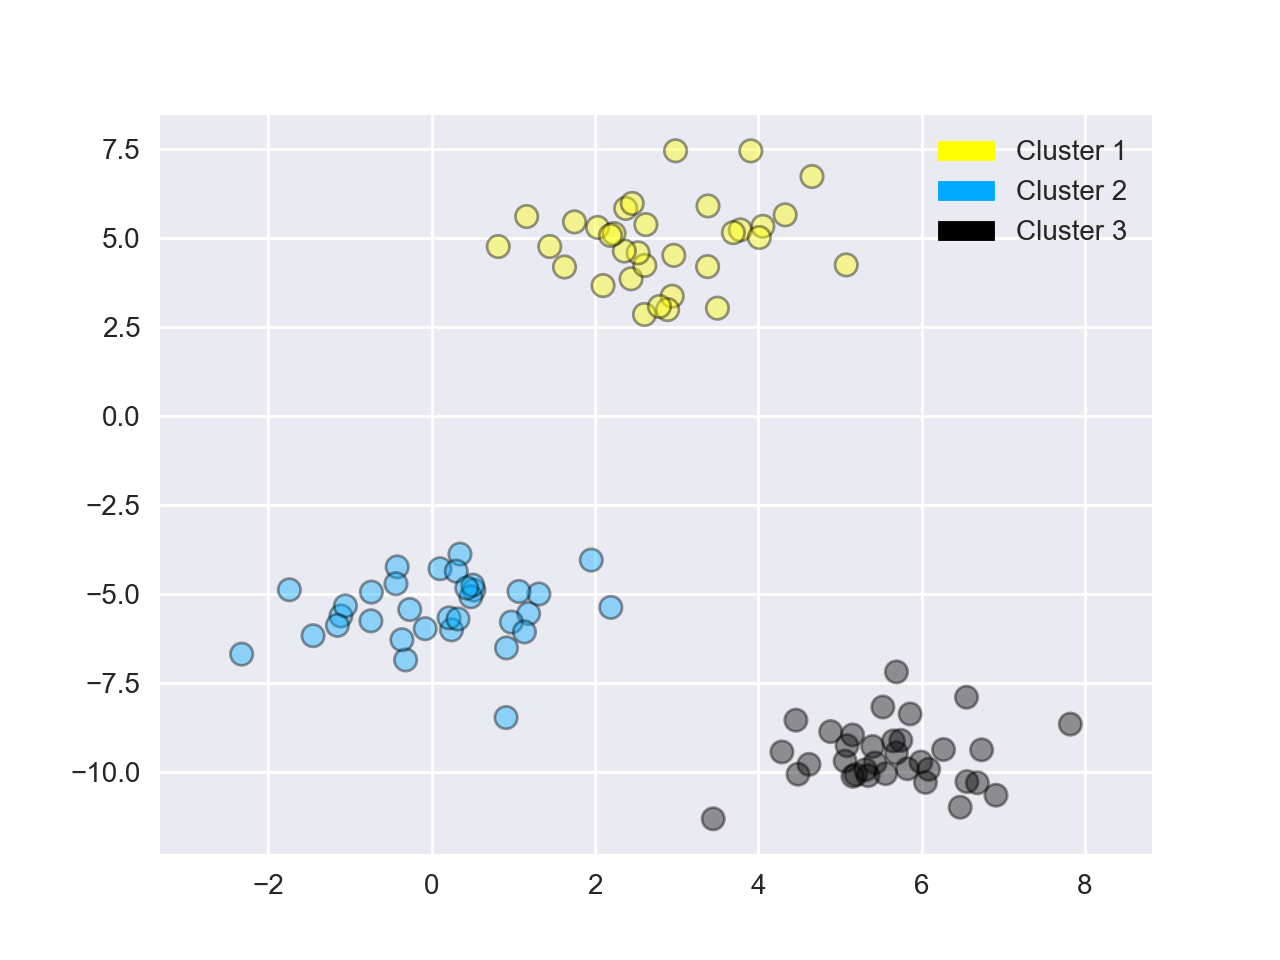

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

One of the nice things about agglomerative clustering is that **it automatically arranges the data into a hierarchy as an effect of the algorithm, reflecting the order and cluster distance at which each data point is assigned to successive clusters**. 

This hierarchy can be useful to visualize using what's called a **dendrogram**, which can be used even with higher dimensional data. Here's the **dendogram corresponding to the Ward's method clustering** of the previous data set example. The data points are at the bottom and are numbered. The y axis represents cluster distance, namely, **the distance that two clusters are apart in the data space**. 

The **data points form the leaves** of the tree at the bottom, and the **new node parent** in the tree is **added as each pair of successive clusters is merged**. **The height of the node parent** along the y axis **captures how far apart the two clusters were when they merged**, with the **branch going up representing the new merged cluster**. Note that you can tell how far apart the merged clusters are by the length of each branch of the tree. 

This property of a dendogram can help us figure out the right number of clusters. **In general, we want clusters that have highly similar items within each cluster, but that are far apart from other clusters**. For example, we can see that going from clusters \# 3 to \# 2 happens at a fairly high Y value. Which means the clusters that were merged were a significant distance apart. We might want to avoid choosing two clusters and stick with three clusters that don't involve forcing a merge for clusters that have very dissimilar items in them. 

<img src="module_5_clustering_14.png" alt="jupyter" style="width: 600px;"/>


Scikit-learn doesn't provide the ability to plot dendrograms, but SciPy does. SciPy handles clustering a little differently than scikit-learn, but here is an example. 
We first import the ```dendrogram``` in word functions from the ```scipy.cluster.hierarchy``` module. The word function returns an array that specifies the distances spanned during the agglomerative clustering. This word function returns a linkage array, which can then be passed to the dendogram function to plot the tree. 

Typically, making use of this hierarchy is most useful when the underlying data itself follows some kind of hierarchical process so the tree is easily interpreted. For example, hierarchical clustering is especially **useful for genetic and other biological data where the levels represent stages of mutation or evolution**. 

<img src="module_5_clustering_15.png" alt="jupyter" style="width: 600px;"/>


#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


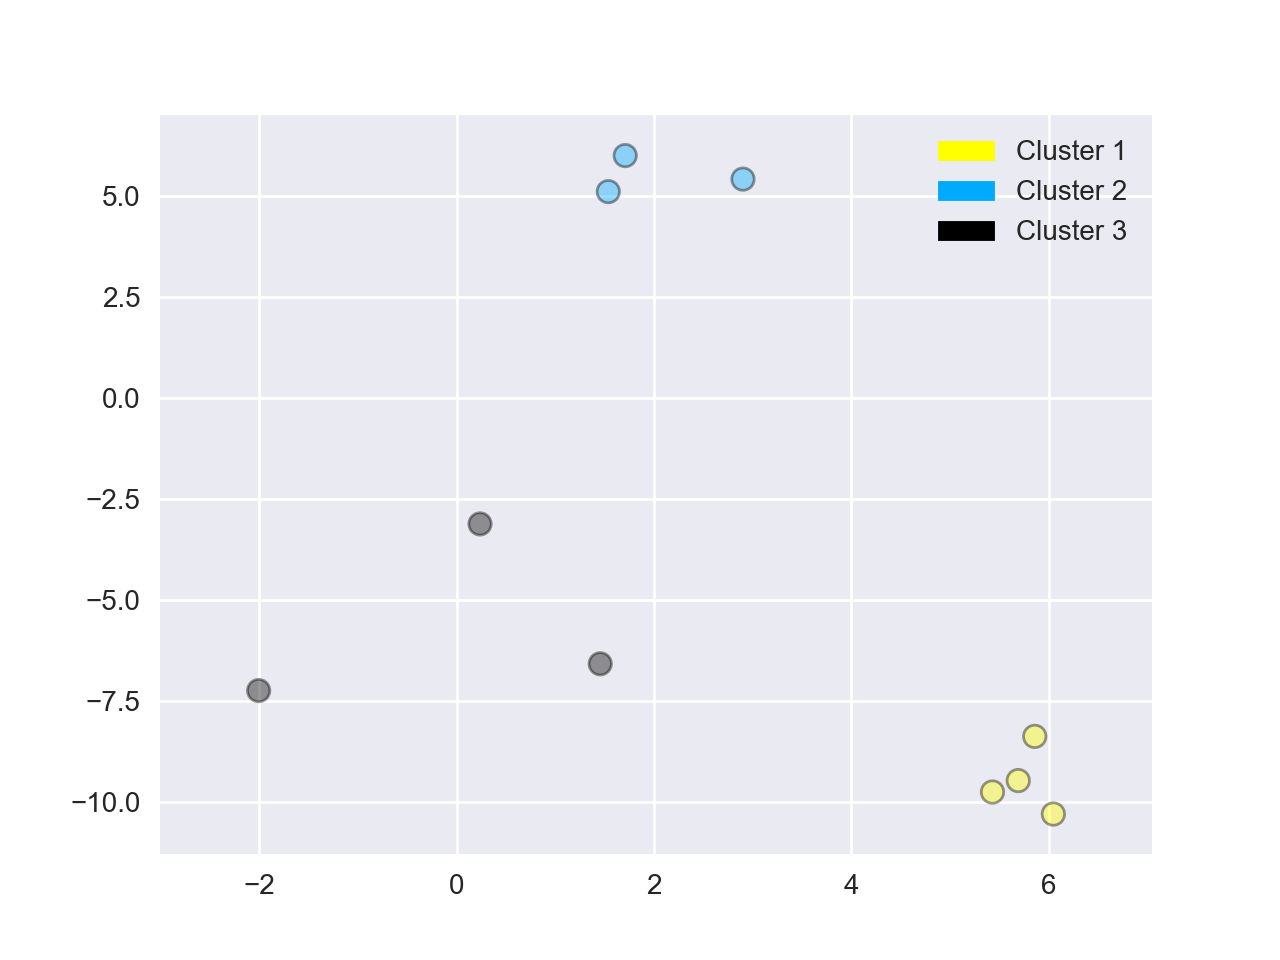

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [15]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


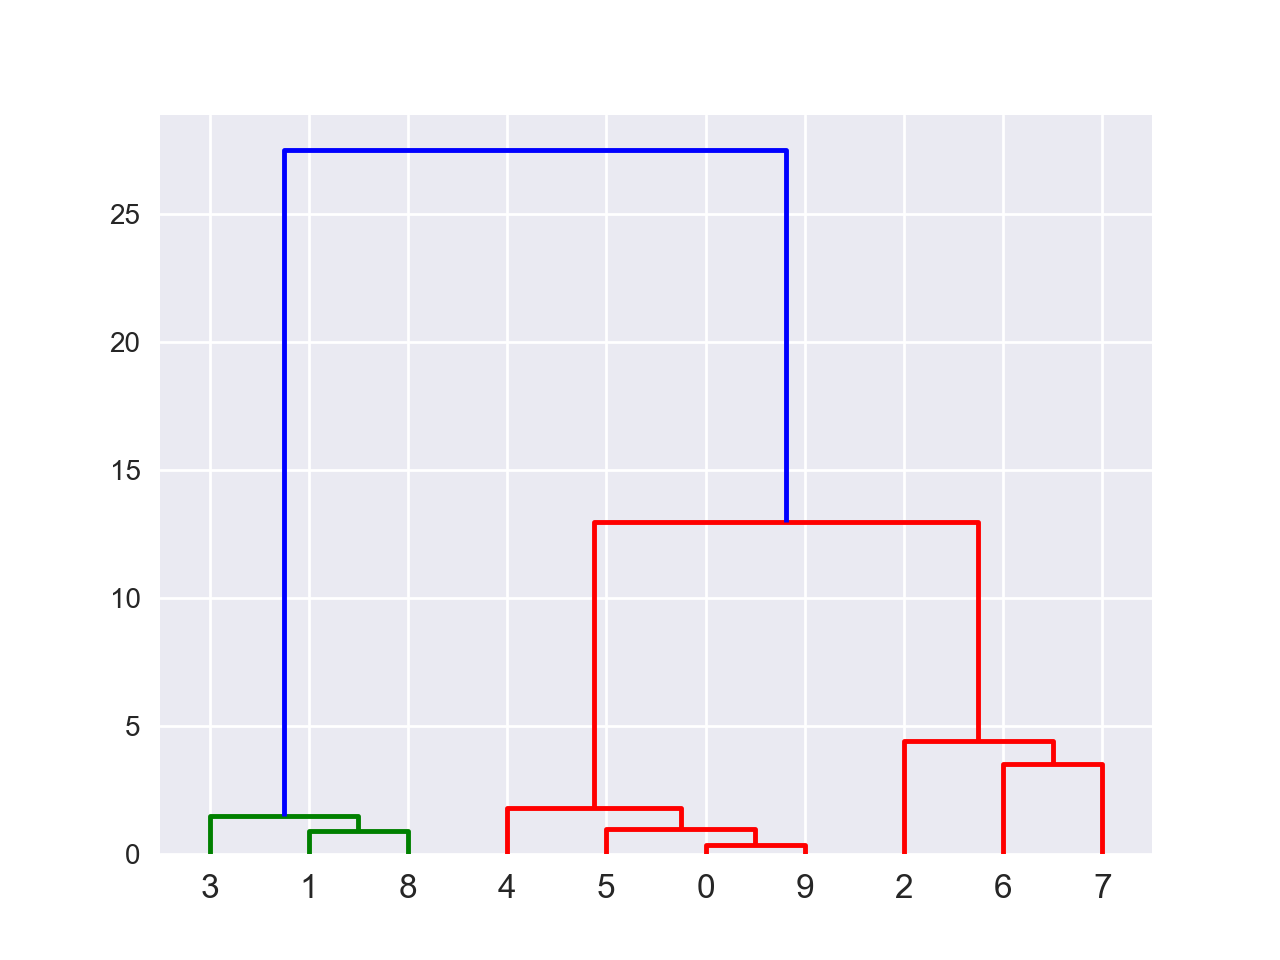

In [16]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

<a id="DBSCAN"></a> 
### DBSCAN clustering

But there are other data sets where both k-means clustering and agglomerative clustering don't perform well. So we're now going to give an overview of a third clustering method called DBSCAN. **DBSCAN** is an acronym that stands for density-based spatial clustering of applications with noise. One **advantage** of DBSCAN is that **you don't need to specify the number of clusters in advance**. Another advantage is that **it works well with datasets that have more complex cluster shapes**. It can also **find points that are outliers that shouldn't reasonably be assigned to any cluster**. DBSCAN is relatively efficient and can be used for large datasets. **The main idea behind DBSCAN is that clusters represent areas in the dataspace that are more dense with data points, while being separated by regions that are empty or at least much less densely populated**. 

The two main parameters for DBSCAN are **min samples** and **eps**. All points that lie in a more **dense region are called core samples**. For a given data point, if there are *min sample* of other data points that lie within a distance of *eps*, that given data points is labeled as a *core sample*. Then, all *core samples* that are with a distance of *eps units* apart are put into the same cluster. 

In addition to points being categorized as *core samples*, points that don't end up belonging to any cluster are considered as *noise*. While points that are within a distance of *eps units* from *core points*, but not core points themselves, are termed *boundary points*. 

<img src="module_5_clustering_16.png" alt="jupyter" style="width: 600px;"/>

Here's an example of DBSCAN applied to a sample data set. As with the other clustering methods, DBSCAN is imported from the Scikit-Learn cluster module, and **just like with a agglomerative clustering, DBSCAN doesn't make cluster assignments from new data. So we use the fit predict method to cluster and get the cluster assignments back in one step**. One consequence of not having the right settings of *eps* and *min samples* for your particular dataset might be that the cluster memberships returned by DBSCAN may all be assigned the label -1, which indicates noise. Basically, the *eps* setting does implicitly control the number of clusters that are found. With DBSCAN, **if you've scaled your data using a *standard scalar* or *min-max scalar* to make sure the feature values have comparable ranges, finding an appropriate value for *eps* is a bit easer to do**. 

One final note, make sure that when you use the cluster assignments from DBSCAN, you check for and handle the -1 noise value appropriately. Since this negative value might cause problems, for example, if the cluster assignment is used as an index into another array later on. 

<img src="module_5_clustering_17.png" alt="jupyter" style="width: 600px;"/>


Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2  1]


<IPython.core.display.Javascript object>


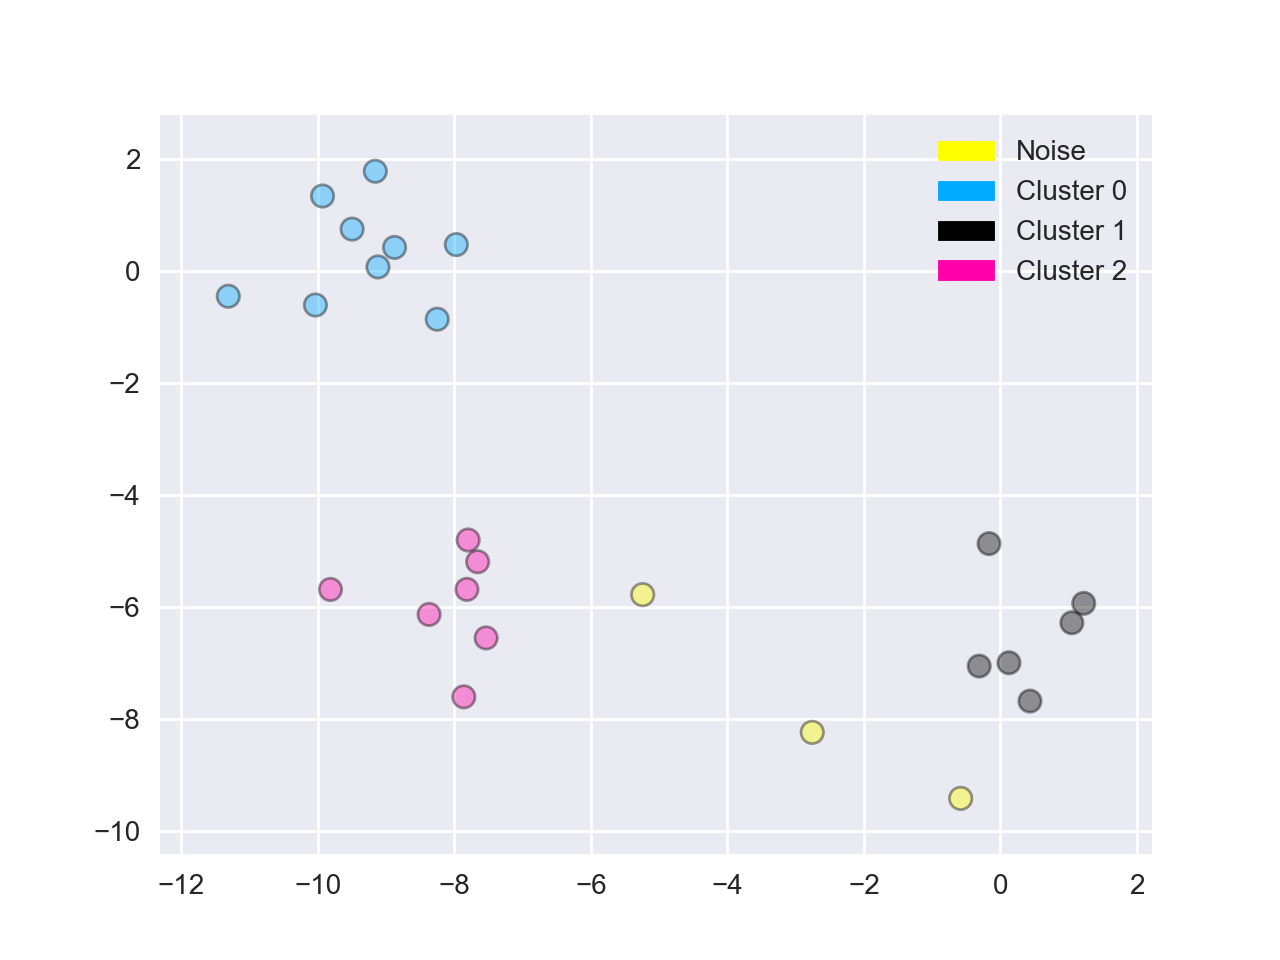

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

Unlike supervised learning, where we have existing labels or target values to use for evaluating the effectiveness of the learning method, **it can be difficult to evaluate unsupervised learning algorithms automatically. Since there's typically no ground truth to compare against**. 

In some cases, as in the breast cancer example, we may have existing labels that can be used to evaluate the quality of the clusters by comparing the assignment of a data point to a cluster with the label assigned to the same data point. But there are many cases where labels are not available. 

In addition, in the case of clustering, for example, there's ambiguity, in a sense that there are typically multiple clusterings that could be plausibly assigned to a given data set. And none of them is obviously better than another unless we have some additional criteria. Such as, performance on the specific application task that does have an objective evaluation to use as a basis for comparison. 

For example, in cases where the results of the clustering are used as features for supervised learning, we could use the overall classifier accuracy gain from adding these clustering-based features as a measure of success for the underlying clustering. 

Another issue with evaluating clustering algorithms is that it can be hard to automatically interpret or label the meaning of the clusters that are found. And this is still a step that requires human expertise to judge. 

<img src="module_5_clustering_18.png" alt="jupyter" style="width: 600px;"/>


<a id="revise"></a> 

### Material to read

Wattenberg, et al., "How to Use t-SNE Effectively", Distill, 2016. http://doi.org/10.23915/distill.00002

http://distill.pub/2016/misread-tsne/#citation


[Gleesen, Peter. "How Machines Make Sense of Big Data: an Introduction to Clustering Algorithms", freeCodeCamp, 2017](https://medium.freecodecamp.com/how-machines-make-sense-of-big-data-an-introduction-to-clustering-algorithms-4bd97d4fbaba).